## Demands and time
This code is for vidualize the relationship between the time and the demand

In [64]:
"""
    Dependencies
"""
import pandas as pd
import numpy as np
import datetime
from sklearn import mixture
import matplotlib.pyplot as plt

[]


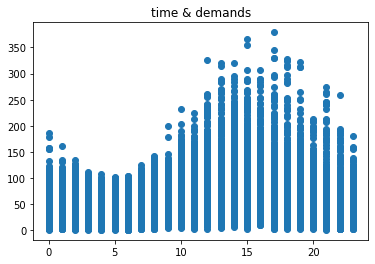

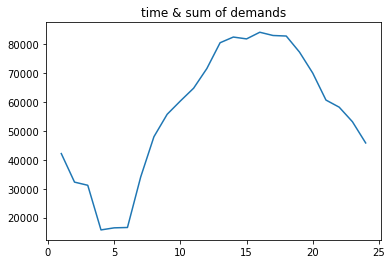

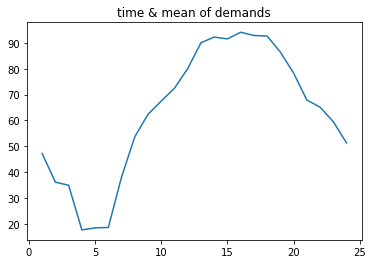

In [65]:
"""
    Read the file and implement the buckets
"""
buckets = [[]]*24
bucket_sizes = []
bucket_means = []
df = pd.read_csv('train_E1GspfA.csv')
print(bucket_sizes)
x = df['hour']
y = df['demand']
z = df['date']
z = z.drop_duplicates();

# fill in the buckets
for i in range(0, len(buckets)):
    buckets[i] = (df.loc[df['hour'] == i])['demand']
    bucket_sizes.append(np.sum(buckets[i]))
    bucket_means.append(np.sum(buckets[i])/len(z))

# show the distribution of the demands
plt.scatter(x, y)
plt.title('time & demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_sizes)
plt.title('time & sum of demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_means)
plt.title('time & mean of demands')
plt.show()

# visualize the distribution
def drawBuckets(buckets):
    for i in range(0, len(buckets)):
        x = np.arange(0, buckets[i].shape[0], 1)
        y = buckets[i]
        print(x.shape)
        print(y.shape)
        plt.scatter(x, y)
        plt.show()

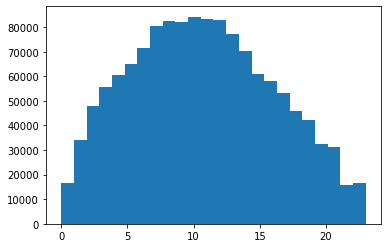

[[11.71089385]
 [ 5.17596443]
 [18.24199312]]
[[[6.48836281]]

 [[7.41710551]]

 [[6.35937313]]]


In [66]:
"""
    Use the guassian mixture model to model the distribution
"""
data = []
for i in range(0,len(bucket_sizes)):
    for j in range(0, bucket_sizes[i]):
        data.append((i+19)%24)

# plt the data
plt.hist(data, bins=24)
plt.show()

# get the data distribution
data = np.array(data).reshape((-1,1))

gmm = mixture.GaussianMixture(
    n_components=3
)
gmm.fit(data)
print(gmm.means_)
print(gmm.covariances_)

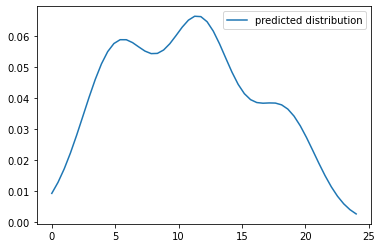

1350122


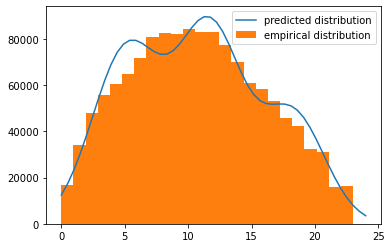

In [67]:
# print the gmm distribution
import scipy.stats as stats
means = gmm.means_
vars = gmm.covariances_
weights = gmm.weights_

x = np.linspace(0, 24)
y = weights[0]*stats.norm.pdf(x, means[0], np.sqrt(vars[0]))[0]+weights[1]*stats.norm.pdf(x, means[1], np.sqrt(vars[1]))[0]+weights[2]*stats.norm.pdf(x, means[2], np.sqrt(vars[2]))[0]
plt.plot(x, y, label = 'predicted distribution')
plt.legend()
plt.show()

print(len(data))
plt.plot(x, y*len(data), label = 'predicted distribution')
plt.hist(data, bins=24, label='empirical distribution')
plt.legend()
plt.show()